# Observable Foraging Behavior in Bees 

## This is a simulation of a small colony of bees and their behavior pattern upon finding food

### This notebook consists of 3 epuck robots placed in a env....
- 3 robots
- all of them just find food
- this behaviour is defined by LOVE towards Trees/Food
- conditional if they are very close to food
    
 __string__
 _string_

In [96]:
from simulator_interface import open_session, close_session
import numpy as np

simulator, epuck1, epuck2, epuck3 = open_session(n_epucks=3)

N_TREES = 8
trees = [f"Tree#{i}" for i in range(N_TREES)]

In [118]:
def looking_for_food(robot):
    # agg
    left, right = robot.prox_activations(tracked_objects=['Food'])
    left_wheel = right
    right_wheel = left
    return left_wheel, right_wheel, 1

    robot.add_log("food_on_left",left_wheel)
    robot.add_log("food_on_right",right_wheel)

def dodge_obstacles(robot):
    left, right = robot.prox_activations(tracked_objects=["20cmHighWall100cm",
                                                          "20cmHighPillar10cm",
                                                          "Tree", "ePuck"])
    obstacle_dists = np.array([left, right])
    # Sequence to avoid epucks getting stuck against an object
    if all(obstacle_dists > 0.93):
        robot.left_wheel = -1
        robot.right_wheel = -1
        robot.wait(1)
        robot.left_wheel = 0
        robot.wait(.2)
        robot.left_wheel = 1
        robot.right_wheel = 1
        robot.wait(2)
        robot.left_wheel = 0
        robot.right_wheel = 0

    left_wheel = left
    right_wheel = right
    return left_wheel, right_wheel, .5

def smell_trees(robot):
    left, right = robot.prox_activations(tracked_objects= trees)
    
    left_wheel = 1 - right
    right_wheel = 1 - left   
    return left_wheel, right_wheel, 0.5
    e.add_log("left_prox", left_wheel)
            # record the right proximeter activation in the topic called "right_prox"
    e.add_log("right_prox", right_wheel)
            # record the energy level in the topic called "energy"
            

def log_position(robot):
    robot.add_log("position", robot.position())

def check_if_tree_is_food(robot):
    left, right = robot.prox_activations(tracked_objects=['Food'])
    dists = np.array([left, right])
    _, objs = robot.proximeters(mode="obj", tracked_objects=['Food'])
    
    if all(dists > 0.9) and any(['Food' in o for o in objs]):
        #simulator.remove_object(objs[0])
        print('Food Found')
        robot.found = True
        for e in simulator.robots:
            robot.detach_all_behaviors()
            robot.detach_all_routines()
            
            # Success dance
            robot.left_wheel = -1
            robot.right_wheel = -1
            robot.wait(.2)
            robot.left_wheel = 0
            robot.wait(1)
            robot.right_wheel = 0
            
def epuck_log(robot):
    left, right = robot.prox_activations()
    robot.add_log("left_prox", left)
    robot.add_log("right_prox", right)
            


In [119]:
initial_objects = []
initial_objects.append("indoorPlant")
for e in simulator.robots:
    e.to_find = initial_objects
    e.found = False

In [130]:
for e in simulator.robots:
    e.detach_all_behaviors()
    e.attach_behavior(looking_for_food, freq=10)
    e.attach_behavior(dodge_obstacles, freq=10)
    #e.attach_behavior(smell_trees, freq=10)
    #e.attach_behavior(fear, freq=10)
    e.start_all_behaviors()
    
    e.attach_routine(check_if_tree_is_food, freq=5)
    e.attach_routine(log_position, freq=5)
    e.attach_routine(epuck_log, freq=1)
    e.start_all_routines()

Behavior looking_for_food started
Behavior dodge_obstacles started
Routine check_if_tree_is_food started
Routine log_position started
Routine check_if_tree_is_food started
Routine log_position started
Routine check_if_tree_is_food started
Routine log_position started
Routine epuck_log started
Behavior looking_for_food started
Behavior dodge_obstacles started
Routine check_if_tree_is_food started
Routine log_position started
Routine epuck_log started
Behavior looking_for_food started
Behavior dodge_obstacles started
Routine check_if_tree_is_food started
Routine log_position started
Routine epuck_log started
Food Found


In [72]:
for e in simulator.robots:
    e.detach_all_behaviors()

In [30]:
from time import sleep

In [31]:
sleep(0.1)

In [ ]:
for e in simulator.robots:
    print(e.found)

In [ ]:
for e in simulator.robots:
    left, right = e.prox_activations(tracked_objects=['indoor'])
    dists = np.array([left, right])
    _, objs = e.proximeters(mode="obj", tracked_objects=['indoor'])
    print(dists)
    print(all(dists < 0.5))
    print(objs)
    print(any(['Food' in o for o in objs]))
    if all(dists < 0.5) and any(['Food' in o for o in objs]):
        print(e.found)
    print('-'*50)

In [ ]:
simulator.robots

In [ ]:
simulator.robots[-1] == epuck3

In [ ]:
robot.to_find

In [74]:
?? robot.proximeters

Object ` robot.proximeters` not found.


In [89]:
for e in simulator.robots:
    print(e)
    print(e.to_find)
    print(e.found)
    print('-'*20)

['indoorPlant']
False
--------------------
['indoorPlant']
True
--------------------
['indoorPlant']
True
--------------------


In [ ]:
_, objs = epuck1.proximeters(mode="obj")


In [ ]:
_

In [ ]:
import matplotlib.pyplot as plt
import numpy as np


## Results

In this notebook we tried to replicate the foraging behavior that is observed in bees. For this purpose the following behaviors are defined:

- __looking_for_food__ : the foraging behavior where the bee travels from one tree to another with the goal of reaching the _food_
- __dodge_obstacles__ : Similar to real world scenarios the bees are exposed to unwanted obstacles that slow their perfomance and distract them from their goal

And to track the behaviors we have implemented two routines:
- __check_if_tree_is_food__ : Checking the tree in order to verify if it is the desired food source
- __log_position__ : Logging the position of the Bees in order to plot the paths in the final step
Taken from 1978 paper by 1978, we can observe the different foraging strategies of different bee species. It shows a significant between-species differences in the length of time to discovery of the baits(food sources)


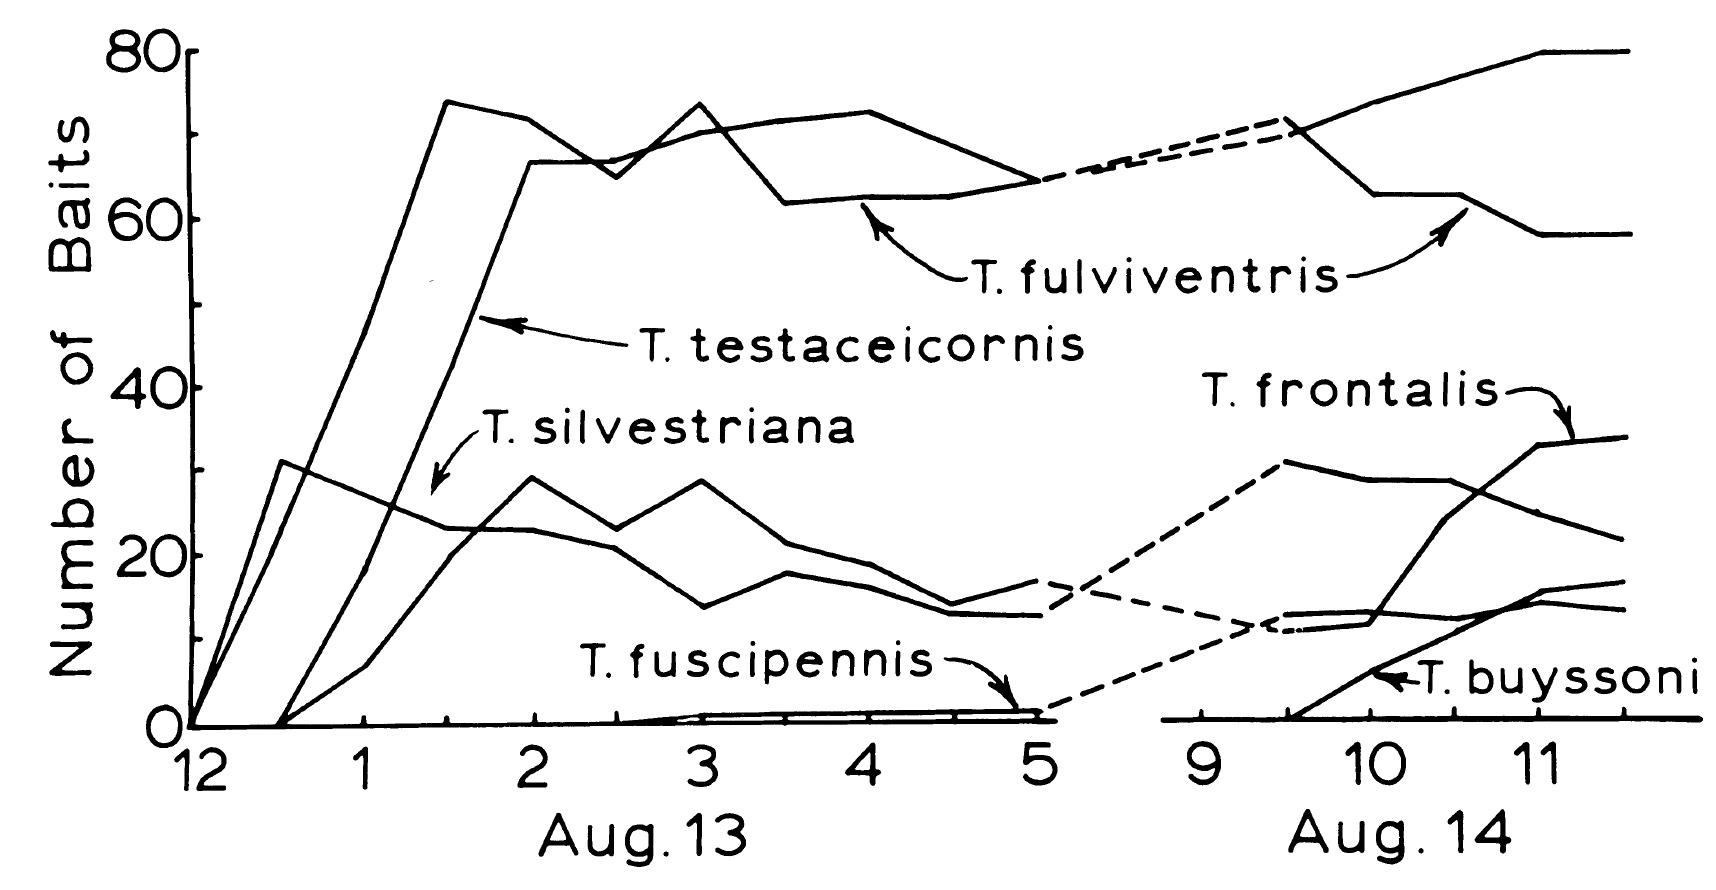

_FIG. 1. Standing number of baits visited at each census period by each bee species (Trigona spp.) X-axis indicates hour of the census. Note gap between days (baits closed)._ 
Source: Hubbell, S. P., & Johnson, L. K. (1978). Comparative foraging behavior of six stingless bee species exploiting a standardized resource. Ecology, 59(6), 1123-1136.


It is observed that although all Bees are in almost distance to the food, the sensors Bee#1 (epuck1) is the one to __achieve to reach the food before the test of the colony__. As we can observe from the graph plotting the foraging paths of indivual Bees, in every iteration the same bee achieves to reach the food and eventually notify the others.

### Tracing the paths

With the __position__ log defined as a routine we can plot a birds-eye view of the environment and analyze each path of the bees on their way to food.

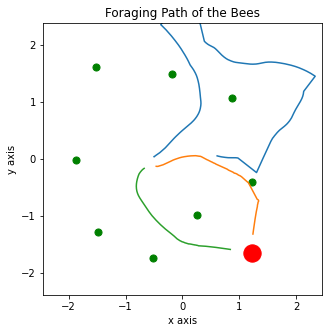

In [88]:
paths = [np.array(e.get_log('position')) for e in simulator.robots]

plt.figure(figsize=(5, 5))
plt.axis('equal')

plt.xlim(-2.45, 2.45)
plt.ylim(-2.45, 2.45)

xlabel("x axis")
ylabel('y axis')
title('Foraging Path of the Bees')

trees = [f"Tree#{i}" for i in range(N_TREES)]
for t in trees:
    p = simulator.get_object_position(t)
    plt.scatter(p[0], p[1], s=50, c='green')
    
p = simulator.get_object_position('Food')
plt.scatter(p[0], p[1], s=300, c='red')

for path in paths:
    plt.plot(path[:, 0], path[:, 1])

With epuck1, epuck2, epuck3 representing the orange, green and blue lines respectively we observe the epuck1 and epuck2 directly reaching to the food source without getting lost or distacted within the environment. Whereas epuck3 struggles to find it's way and is lured towards other Trees, assuming they are the highest nutrional source within the environment.

If we plot the proximator values of all three epucks we can observe that:

Populating the interactive namespace from numpy and matplotlib


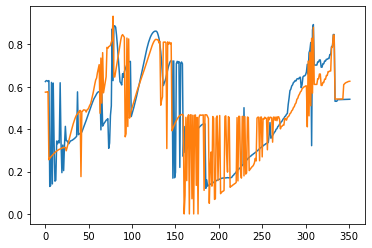

Food Found


In [140]:
%pylab inline

plot(epuck1.get_log("left_prox"))
plot(epuck1.get_log("right_prox"))


As epuck1 is the first bee to reach the __Food__ we can observe the over-stimulation on the sensors caused by __the waggle dance__ in order to inform the other bees on the location of the food.

Populating the interactive namespace from numpy and matplotlib


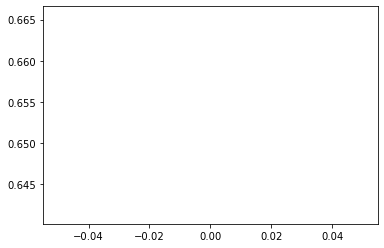

In [141]:
%pylab inline

plot(epuck2.get_log("left_prox"))
plot(epuck2.get_log("right_prox"))


Populating the interactive namespace from numpy and matplotlib


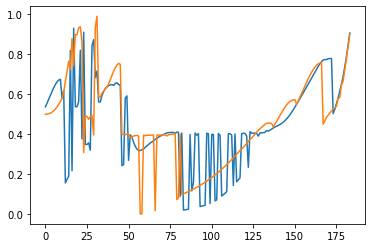

In [142]:
%pylab inline

plot(epuck3.get_log("left_prox"))
plot(epuck3.get_log("right_prox"))